In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Import the Data
Let's extract the our **Titanic data** from the .csv file, create a  pandas DataFrame and look at the available indicators:

- ***Survived***: Outcome of survival (0 = No; 1 = Yes)
- ***Pclass***: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- ***Name***: Name of passenger
- ***Sex***: Sex of the passenger
- ***Age***: Age of the passenger (Some entries contain NaN)
- ***SibSp***: Number of siblings and spouses of the passenger aboard
- ***Parch***: Number of parents and children of the passenger aboard
- ***Ticket***: Ticket number of the passenger
- ***Fare***: Fare paid by the passenger
- ***Cabin***: Cabin number of the passenger (Some entries contain NaN)
- ***Embarked***: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

In [43]:
df = pd.read_csv("titanic_dataset.csv" , index_col=0)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [6]:
df.shape

(891, 11)

In [8]:
df.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


## Distribution plots

In [25]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [15]:
len(df['Parch'].unique())

7

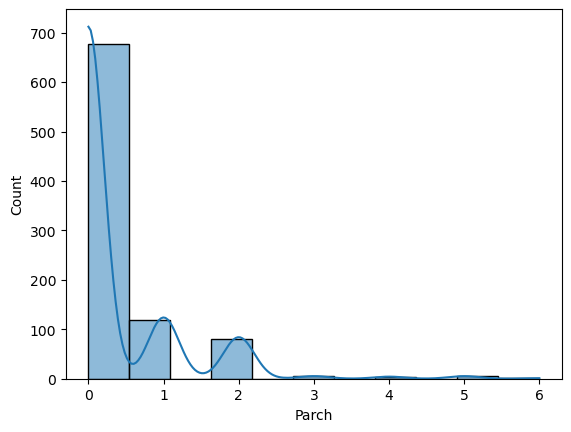

In [45]:
sns.histplot(df['Parch'],kde=True)
plt.show()

In [35]:
df.shape

(891, 12)

**As we can see, most passengers don't have neither parents nor children aboard.**

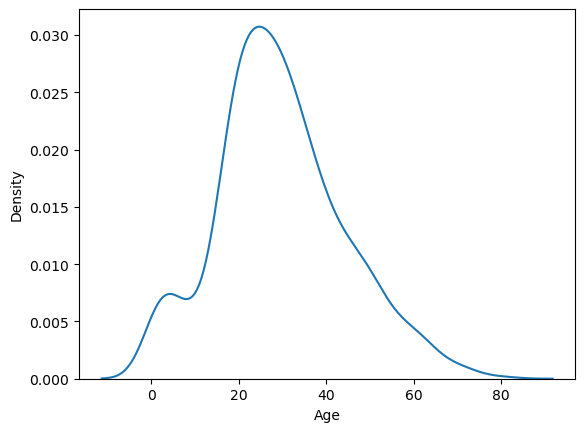

In [56]:
sns.distplot(df['Age'], hist=False)
plt.show()

**As we can see that most of the passenger has the age between 20 to 40**

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(df['Age'])
plt.show()

In [ ]:
df.isnull().sum()

In [ ]:
# Heatmap
sns.heatmap(df.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data')
plt.show()

In [ ]:
df['Age'].median()

In [ ]:
df['Age'].mean()

In [ ]:
sns.boxplot(df['Age'])

In [ ]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = df, palette= 'GnBu_d').set_title('Age by Passenger Class')
plt.show()

In [ ]:
# Imputation function
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age


In [ ]:
# Apply the function to the Age column
df['Age']=df[['Age','Pclass']].apply(impute_age, axis =1)

In [ ]:
df['Age'].isnull().sum()

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
# Remove Cabin feature
df.drop('Cabin', axis = 1, inplace = True)

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.info()

In [ ]:
df = df.dropna()

In [ ]:
df.info()

## **Relational plots**

In [ ]:
sns.relplot(x="Age", y="Fare", col="Pclass", hue="Sex", style="Sex",kind="line", data=df)
plt.show()

In [ ]:
# scatter can be used instead of "line" plot
sns.relplot(x="Age", y="Fare", col="Pclass", hue="Sex", style="Sex", data=df)
plt.show()

## **Scatterplot**

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="Age", y="Fare", hue="Sex", data=df)
plt.show()

## **lineplot**

In [ ]:
plt.figure(figsize=(8,8))
sns.lineplot(x="Age", y="Fare", hue="Sex", style="Sex", data=df)
plt.show()

# **Categorical Plot**

### **barplot**

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=df)
plt.show()

**As we can see, More women survived than men.**

### **stripplot**

In [ ]:
plt.figure(figsize=(8,8))
sns.stripplot(x="Sex", y="Age",hue='Sex', data=df)
plt.show()

### **swarmplot**

In [ ]:
plt.figure(figsize=(8,8))
sns.swarmplot(x="Sex", y="Age",hue='Sex', data=df)
plt.show()

**We can said that more passengers are approximally between 18 and 40 years old.**

### **violinplot**

Violin Plots are a combination of the box plot with the kernel density estimates. So, these plots are easier to analyze and understand the distribution of the data.

In [ ]:
sns.violinplot(x="Survived", y="Age", hue='Sex', data=df)
plt.show()

### **Countplot**

In [ ]:
sns.countplot(x="Survived", data=df, palette="Blues");
plt.show()

In [ ]:
sns.countplot(x = "Pclass", hue = "Sex",data = df)
plt.show()

In [ ]:
sns.countplot(y = "Sex", data = df)
plt.show()

## **Multi-plot grids**

### **Facet grids**

In [ ]:
# initialize the FacetGrid object
g = sns.FacetGrid(df, col='Survived', row='Pclass')

g.map(plt.hist, 'Age')
g.add_legend()
plt.show()

In [ ]:
sns.pairplot(data=df)
plt.show()

## **Matrix plots**

### **heatmap**

In [ ]:
df.corr()

In [ ]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df

In [ ]:
numeric_df.dtypes

In [ ]:
numeric_df.corr()

In [ ]:
sns.heatmap(numeric_df.corr(), cmap="YlGnBu", annot=True, fmt=".2f")
plt.show()